In [2]:
import utils
import PCA
import metrics
import LogisticRegression
import GMM
import GaussianClassifierTiedCov
import numpy as np
import matplotlib.pyplot as plt

In [7]:
priors = [0.5, 0.9, 0.1]
D, L = utils.load('Train.txt')
ZD, mean, standardDeviation = utils.ZNormalization(D)
PCA7=PCA.PCA(ZD, L, 7)
gc = GaussianClassifierTiedCov.GaussianClassifierTiedCov()
lr = LogisticRegression.LogisticRegression()
lambd = 1e-4
numberOfSplitToPerform = 3
gmm = GMM.GMM()
numberOfPoints=21
effPriorLogOdds = np.linspace(-3, 3, numberOfPoints)
effPriors = 1/(1+np.exp(-1*effPriorLogOdds))

In [8]:
print("Start Tied-Cov with 3-fold on z normalized features PCA m=7")
print("")
for i in range(len(priors)):
    actualDCF = utils.KfoldActualDCF(PCA7, L, gc, prior=priors[i])
    print("Actual DCF MVG Tied-cov with prior=%.1f:  %.3f" %(priors[i], actualDCF))
print("")
print("END")

Start Tied-Cov with 3-fold on z normalized features PCA m=7

Actual DCF MVG Tied-cov with prior=0.5:  0.191
Actual DCF MVG Tied-cov with prior=0.9:  1.422
Actual DCF MVG Tied-cov with prior=0.1:  0.274

END


In [9]:
print("Start Linear Logistic Regression with 3-fold on z normalized features PCA m=7 with lambda=10^(-4) and pi_T=0.5")
print("")
for i in range(len(priors)):
    actualDCF = utils.KfoldLRActualDCF(PCA7, L, lr, lambd, prior=priors[i])
    print("Actual DCF Linear Logistic Regression with prior=%.1f:  %.3f" %(priors[i], actualDCF))
print("")
print("END")

Start Linear Logistic Regression with 3-fold on z normalized features PCA m=7 with lambda=10^(-4) and pi_T=0.5

Actual DCF Linear Logistic Regression with prior=0.5:  0.117
Actual DCF Linear Logistic Regression with prior=0.9:  0.545
Actual DCF Linear Logistic Regression with prior=0.1:  0.227

END


In [14]:
print("Start Full-Cov 8 GMM components with 3-fold on z normalized features")
print("")
for i in range(len(priors)):
    actualDCF = utils.KfoldGMMActualDCF(ZD, L, gmm, numberOfSplitToPerform, prior=priors[i])
    print("Actual DCF Full-Cov 8 GMM components with prior=%.1f:  %.3f" %(priors[i], actualDCF))
print("")
print("END")

Start Full-Cov 8 GMM components with 3-fold on z normalized features

Actual DCF Full-Cov 8 GMM components with prior=0.5:  0.122
Actual DCF Full-Cov 8 GMM components with prior=0.9:  0.692
Actual DCF Full-Cov 8 GMM components with prior=0.1:  0.242

END


At iteration 0 the min DCF is 0.295453514397357 and the actual DCF is 0.320326556275133
At iteration 1 the min DCF is 0.2653145734972075 and the actual DCF is 0.29990267382586455
At iteration 2 the min DCF is 0.2412287190559445 and the actual DCF is 0.2851051073285994
At iteration 3 the min DCF is 0.2164633908161472 and the actual DCF is 0.2674771134964592
At iteration 4 the min DCF is 0.19792717596244253 and the actual DCF is 0.2532197122564624
At iteration 5 the min DCF is 0.18062608802880387 and the actual DCF is 0.23892145794065006
At iteration 6 the min DCF is 0.16213841439006027 and the actual DCF is 0.22670116541588195
At iteration 7 the min DCF is 0.14536033398021542 and the actual DCF is 0.2201104335230623
At iteration 8 the min DCF is 0.1316780507591274 and the actual DCF is 0.20942101884406086
At iteration 9 the min DCF is 0.12122702963278725 and the actual DCF is 0.19872294745445554
At iteration 10 the min DCF is 0.11190551705891076 and the actual DCF is 0.19081418187647642

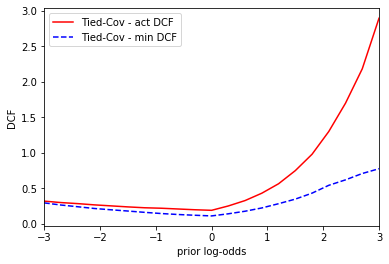

In [16]:
#TIED-COV
actualDCFs = []
minDCFs = []
for i in range(numberOfPoints):
    actualDCFs.append(utils.KfoldActualDCF(PCA7, L, gc, prior=effPriors[i]))
    minDCFs.append(utils.Kfold(PCA7, L, gc, prior=effPriors[i]))
    print("At iteration", i, "the min DCF is", minDCFs[i], "and the actual DCF is", actualDCFs[i])
utils.bayesErrorPlot(actualDCFs, minDCFs, effPriorLogOdds, "Tied-Cov")

At iteration 0 the min DCF is 0.29087191579654176 and the actual DCF is 0.3110803566204902
At iteration 1 the min DCF is 0.2568386512707386 and the actual DCF is 0.27380725084022894
At iteration 2 the min DCF is 0.23162618880074284 and the actual DCF is 0.24703548480386311
At iteration 3 the min DCF is 0.2127376090381546 and the actual DCF is 0.2202564979942532
At iteration 4 the min DCF is 0.1953612609351046 and the actual DCF is 0.200132093154162
At iteration 5 the min DCF is 0.1740863844890411 and the actual DCF is 0.1848604198492436
At iteration 6 the min DCF is 0.15832556837504494 and the actual DCF is 0.17285721493398762
At iteration 7 the min DCF is 0.14511042235232902 and the actual DCF is 0.16036472612302022
At iteration 8 the min DCF is 0.1351436645797585 and the actual DCF is 0.13822470804968737
At iteration 9 the min DCF is 0.12442504626498496 and the actual DCF is 0.1281750683257811
At iteration 10 the min DCF is 0.11549814771884029 and the actual DCF is 0.1173634249705559

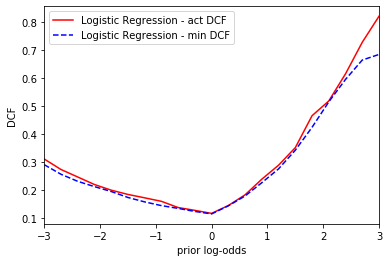

In [17]:
#LINEAR LOGISTIC REGRESSION
actualDCFs = []
minDCFs = []
for i in range(numberOfPoints):
    actualDCFs.append(utils.KfoldLRActualDCF(PCA7, L, lr, lambd, prior=effPriors[i]))
    minDCFs.append(utils.KfoldLR(PCA7, L, lr, lambd, prior=effPriors[i]))
    print("At iteration", i, "the min DCF is", minDCFs[i], "and the actual DCF is", actualDCFs[i])
utils.bayesErrorPlot(actualDCFs, minDCFs, effPriorLogOdds, "Logistic Regression")

At iteration 0 the min DCF is 0.30528073122308547 and the actual DCF is 0.32815974177133767
At iteration 1 the min DCF is 0.27445815202990526 and the actual DCF is 0.2905270720173053
At iteration 2 the min DCF is 0.2476593515349625 and the actual DCF is 0.2573761423122467
At iteration 3 the min DCF is 0.22377155159568435 and the actual DCF is 0.22913681652338935
At iteration 4 the min DCF is 0.20523533674197966 and the actual DCF is 0.20731039249954028
At iteration 5 the min DCF is 0.18248189019131175 and the actual DCF is 0.19069833482680537
At iteration 6 the min DCF is 0.16328235056153464 and the actual DCF is 0.17377154842353965
At iteration 7 the min DCF is 0.149058981775095 and the actual DCF is 0.15729069031822426
At iteration 8 the min DCF is 0.13647056777614808 and the actual DCF is 0.140095361935454
At iteration 9 the min DCF is 0.1238295885679641 and the actual DCF is 0.13117216448174113
At iteration 10 the min DCF is 0.11446492084328261 and the actual DCF is 0.1218500064679

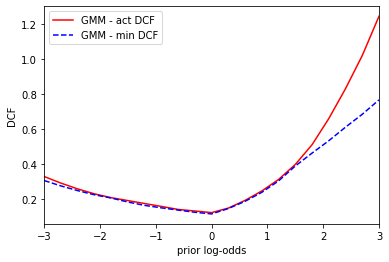

In [25]:
#GMM
actualDCFs = []
minDCFs = []
for i in range(numberOfPoints):
    actualDCFs.append(utils.KfoldGMMActualDCF(ZD, L, gmm, numberOfSplitToPerform, prior=effPriors[i]))
    minDCFs.append(utils.KfoldGMM(ZD, L, gmm, numberOfSplitToPerform, prior=effPriors[i]))
    print("At iteration", i, "the min DCF is", minDCFs[i], "and the actual DCF is", actualDCFs[i])
utils.bayesErrorPlot(actualDCFs, minDCFs, effPriorLogOdds, "GMM")

Working on point: 0
Working on point: 1
Working on point: 2
Working on point: 3
Working on point: 4
Working on point: 5
Working on point: 6
Working on point: 7
Working on point: 8
Working on point: 9
Working on point: 10
Working on point: 11
Working on point: 12
Working on point: 13
Working on point: 14
Working on point: 15
Working on point: 16
Working on point: 17
Working on point: 18
Working on point: 19
Working on point: 20


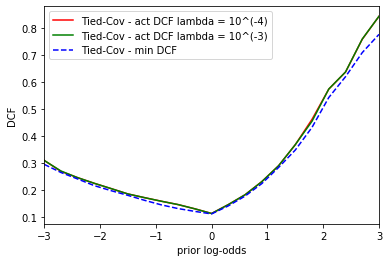

In [11]:
#Score calibration on Tied-Cov
actualDCFs0 = []
actualDCFs1 = []
minDCFs = []
for i in range(numberOfPoints):
    print("Working on point:", i)
    minDCFs.append(utils.Kfold(PCA7, L, gc, prior=effPriors[i]))
    actualDCFs0.append(utils.KfoldActualDCFCalibrated(PCA7, L, gc, lambd=1e-4, prior=effPriors[i]))
    actualDCFs1.append(utils.KfoldActualDCFCalibrated(PCA7, L, gc, lambd=1e-3, prior=effPriors[i]))
utils.bayesErrorPlotV2(actualDCFs0, actualDCFs1, minDCFs, effPriorLogOdds, "Tied-Cov", "10^(-4)", "10^(-3)")

Working on point: 0
Working on point: 1
Working on point: 2
Working on point: 3
Working on point: 4
Working on point: 5
Working on point: 6
Working on point: 7
Working on point: 8
Working on point: 9
Working on point: 10
Working on point: 11
Working on point: 12
Working on point: 13
Working on point: 14
Working on point: 15
Working on point: 16
Working on point: 17
Working on point: 18
Working on point: 19
Working on point: 20


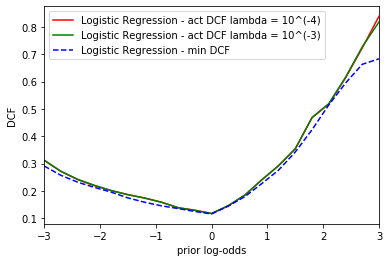

In [12]:
#Score calibration on Logistic Regression
actualDCFs0 = []
actualDCFs1 = []
minDCFs = []
for i in range(numberOfPoints):
    print("Working on point:", i)
    minDCFs.append(utils.KfoldLR(PCA7, L, lr, lambd, prior=effPriors[i]))
    actualDCFs0.append(utils.KfoldLRActualDCFCalibrated(PCA7, L, lr, lambd, lambd2=1e-4, prior=effPriors[i]))
    actualDCFs1.append(utils.KfoldLRActualDCFCalibrated(PCA7, L, lr, lambd, lambd2=1e-3, prior=effPriors[i]))
utils.bayesErrorPlotV2(actualDCFs0, actualDCFs1, minDCFs, effPriorLogOdds, "Logistic Regression", "10^(-4)", "10^(-3)")

Working on point: 0
Working on point: 1
Working on point: 2
Working on point: 3
Working on point: 4
Working on point: 5
Working on point: 6
Working on point: 7
Working on point: 8
Working on point: 9
Working on point: 10
Working on point: 11
Working on point: 12
Working on point: 13
Working on point: 14
Working on point: 15
Working on point: 16
Working on point: 17
Working on point: 18
Working on point: 19
Working on point: 20


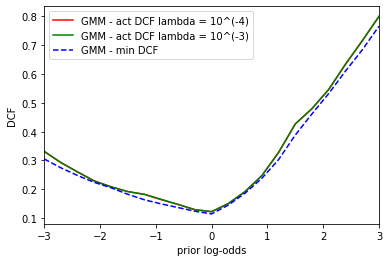

In [13]:
#Score calibration on GMM
actualDCFs0 = []
actualDCFs1 = []
minDCFs = []
for i in range(numberOfPoints):
    print("Working on point:", i)
    minDCFs.append(utils.KfoldGMM(ZD, L, gmm, numberOfSplitToPerform, prior=effPriors[i]))
    actualDCFs0.append(utils.KfoldGMMActualDCFCalibrated(ZD, L, gmm, numberOfSplitToPerform, lambd=1e-4, prior=effPriors[i]))
    actualDCFs1.append(utils.KfoldGMMActualDCFCalibrated(ZD, L, gmm, numberOfSplitToPerform, lambd=1e-3, prior=effPriors[i]))
utils.bayesErrorPlotV2(actualDCFs0, actualDCFs1, minDCFs, effPriorLogOdds, "GMM", "10^(-4)", "10^(-3)")

In [19]:
print("Start Tied-Cov with 3-fold on z normalized features PCA m=7 SCORES CALIBRATED")
print("")
for i in range(len(priors)):
    actualDCF = utils.KfoldActualDCFCalibrated(PCA7, L, gc, lambd=1e-4, prior=priors[i])
    print("Actual DCF MVG Tied-cov with prior=%.1f:  %.3f after score calibration" %(priors[i], actualDCF))
print("")
print("END")

Start Tied-Cov with 3-fold on z normalized features PCA m=7 SCORES CALIBRATED

Actual DCF MVG Tied-cov with prior=0.5:  0.114 after score calibration
Actual DCF MVG Tied-cov with prior=0.9:  0.600 after score calibration
Actual DCF MVG Tied-cov with prior=0.1:  0.229 after score calibration

END


In [22]:
print("Start Linear Logistic Regression with 3-fold on z normalized features PCA m=7 with lambda=10^(-4) and pi_T=0.5 SCORES CALIBRATED")
print("")
for i in range(len(priors)):
    actualDCF = utils.KfoldLRActualDCFCalibrated(PCA7, L, lr, lambd, lambd2=1e-4, prior=priors[i])
    print("Actual DCF Linear Logistic Regression with prior=%.1f:  %.3f after score calibration" %(priors[i], actualDCF))
print("")
print("END")

Start Linear Logistic Regression with 3-fold on z normalized features PCA m=7 with lambda=10^(-4) and pi_T=0.5 SCORES CALIBRATED

Actual DCF Linear Logistic Regression with prior=0.5:  0.117 after score calibration
Actual DCF Linear Logistic Regression with prior=0.9:  0.545 after score calibration
Actual DCF Linear Logistic Regression with prior=0.1:  0.226 after score calibration

END


In [23]:
print("Start Full-Cov 8 GMM components with 3-fold on z normalized features SCORES CALIBRATED")
print("")
for i in range(len(priors)):
    actualDCF = utils.KfoldGMMActualDCFCalibrated(ZD, L, gmm, numberOfSplitToPerform, lambd=1e-4, prior=priors[i])
    print("Actual DCF Full-Cov 8 GMM components with prior=%.1f:  %.3f after score calibration" %(priors[i], actualDCF))
print("")
print("END")

Start Full-Cov 8 GMM components with 3-fold on z normalized features SCORES CALIBRATED

Actual DCF Full-Cov 8 GMM components with prior=0.5:  0.122 after score calibration
Actual DCF Full-Cov 8 GMM components with prior=0.9:  0.599 after score calibration
Actual DCF Full-Cov 8 GMM components with prior=0.1:  0.239 after score calibration

END
